# 1. import

In [242]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbn
sbn.set()

# 2. load

In [243]:
df = pd.read_csv('New_York_Airbnb_Enhanced_Unclean.csv')

In [244]:
df.shape

(5000, 19)

In [245]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,square_feet,bedrooms
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,3962.000000,5000.00000,5000.000000,4729.000000,4746.000000
mean,1.912912e+07,6.730418e+07,40.728155,-73.951201,148.707800,6.667800,22.725600,1.355704,6.56100,107.869200,573.133432,1.218921
std,1.091583e+07,7.777462e+07,0.054884,0.046119,246.528892,16.827135,44.407611,1.719139,29.84254,130.035729,512.675865,0.820643
min,5.022000e+03,2.787000e+03,40.538840,-74.198260,0.000000,1.000000,0.000000,0.010000,1.00000,0.000000,53.000000,0.000000
25%,9.684791e+06,7.888663e+06,40.689575,-73.982647,65.000000,1.000000,1.000000,0.180000,1.00000,0.000000,201.000000,1.000000
50%,1.986688e+07,3.184243e+07,40.722520,-73.955075,100.000000,2.000000,5.000000,0.680000,1.00000,37.500000,333.000000,1.000000
75%,2.918353e+07,1.059510e+08,40.762637,-73.934487,174.000000,5.000000,23.000000,2.000000,2.00000,216.250000,817.000000,1.000000
max,3.647923e+07,2.741955e+08,40.907340,-73.716900,10000.000000,480.000000,510.000000,19.750000,327.00000,365.000000,2532.000000,4.000000


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5000 non-null   int64  
 1   name                            4996 non-null   object 
 2   host_id                         5000 non-null   int64  
 3   host_name                       4998 non-null   object 
 4   neighbourhood_group             5000 non-null   object 
 5   neighbourhood                   5000 non-null   object 
 6   latitude                        5000 non-null   float64
 7   longitude                       5000 non-null   float64
 8   room_type                       5000 non-null   object 
 9   price                           5000 non-null   int64  
 10  minimum_nights                  5000 non-null   int64  
 11  number_of_reviews               5000 non-null   int64  
 12  last_review                     39

In [247]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,amenities,square_feet,bedrooms
0,317905,Come and go as you please in BKLN!,1631733,Jane,Brooklyn,Kensington,40.64354,-73.97777,Entire home/apt,89,3,62,2019-01-02,0.71,1,189,"{""Air conditioning"", ""Heating"", ""Washer""}",512.0,1.0
1,34205267,"Spacious, sunny room in Queens/Brooklyn",913940,Giancarlo,Queens,Ridgewood,40.70666,-73.90779,Private room,30,21,0,NaN,NaN,1,73,"{""Microwave""}",223.0,1.0
2,12342297,Private bedroom in high-ceiling 4BR apartment!,19953913,Alejandro,Manhattan,Hell's Kitchen,40.76116,-73.99016,Private room,120,2,17,2017-04-28,0.43,1,0,"{""Microwave"", ""Washer"", ""Refrigerator""}",215.0,1.0
3,33527778,Sonder | Stock Exchange | Stunning 3BR + Kitchen,219517861,Sonder (NYC),Manhattan,Financial District,40.70763,-74.01050,Entire home/apt,470,2,5,2019-06-02,1.88,327,272,"{""Hot water"", ""Refrigerator"", ""Heating"", ""Air ...",573.0,1.0
4,13136376,Spacious 2 Bedroom with Balcony,16110448,Gingie,Manhattan,East Harlem,40.79658,-73.93287,Entire home/apt,199,2,30,2019-06-03,0.80,1,30,"{""Kitchen"", ""Washer"", ""Heating"", ""Wifi"", ""Air ...",559.0,0.0


# 3.EDA

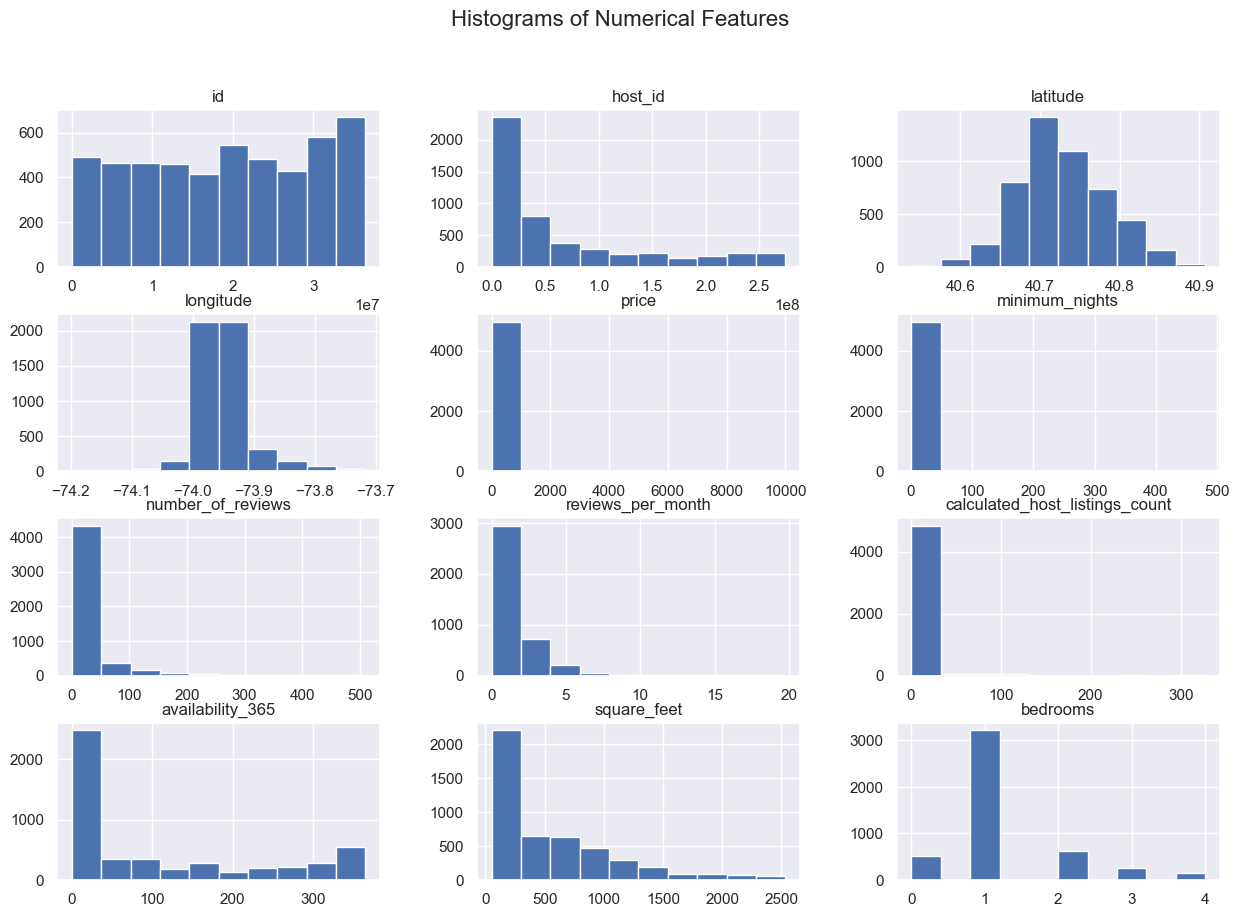

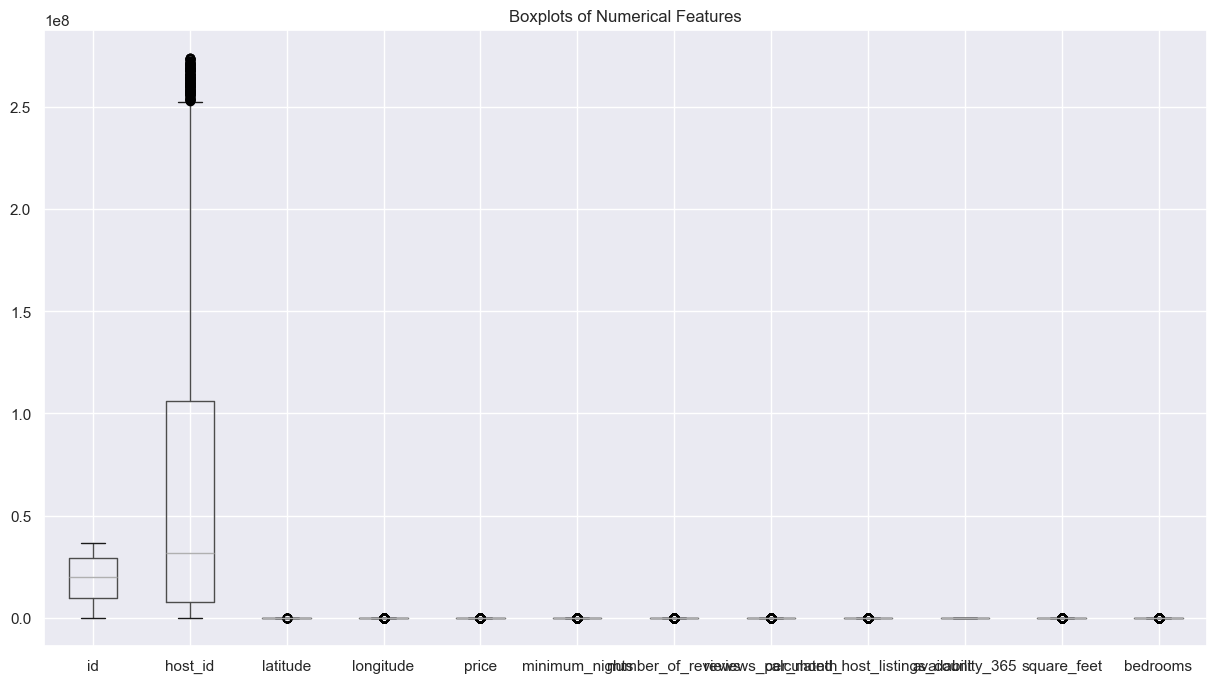

In [248]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Histograms
df[numeric_cols].hist(figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

# Boxplots
plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot()
plt.title("Boxplots of Numerical Features")
plt.show()

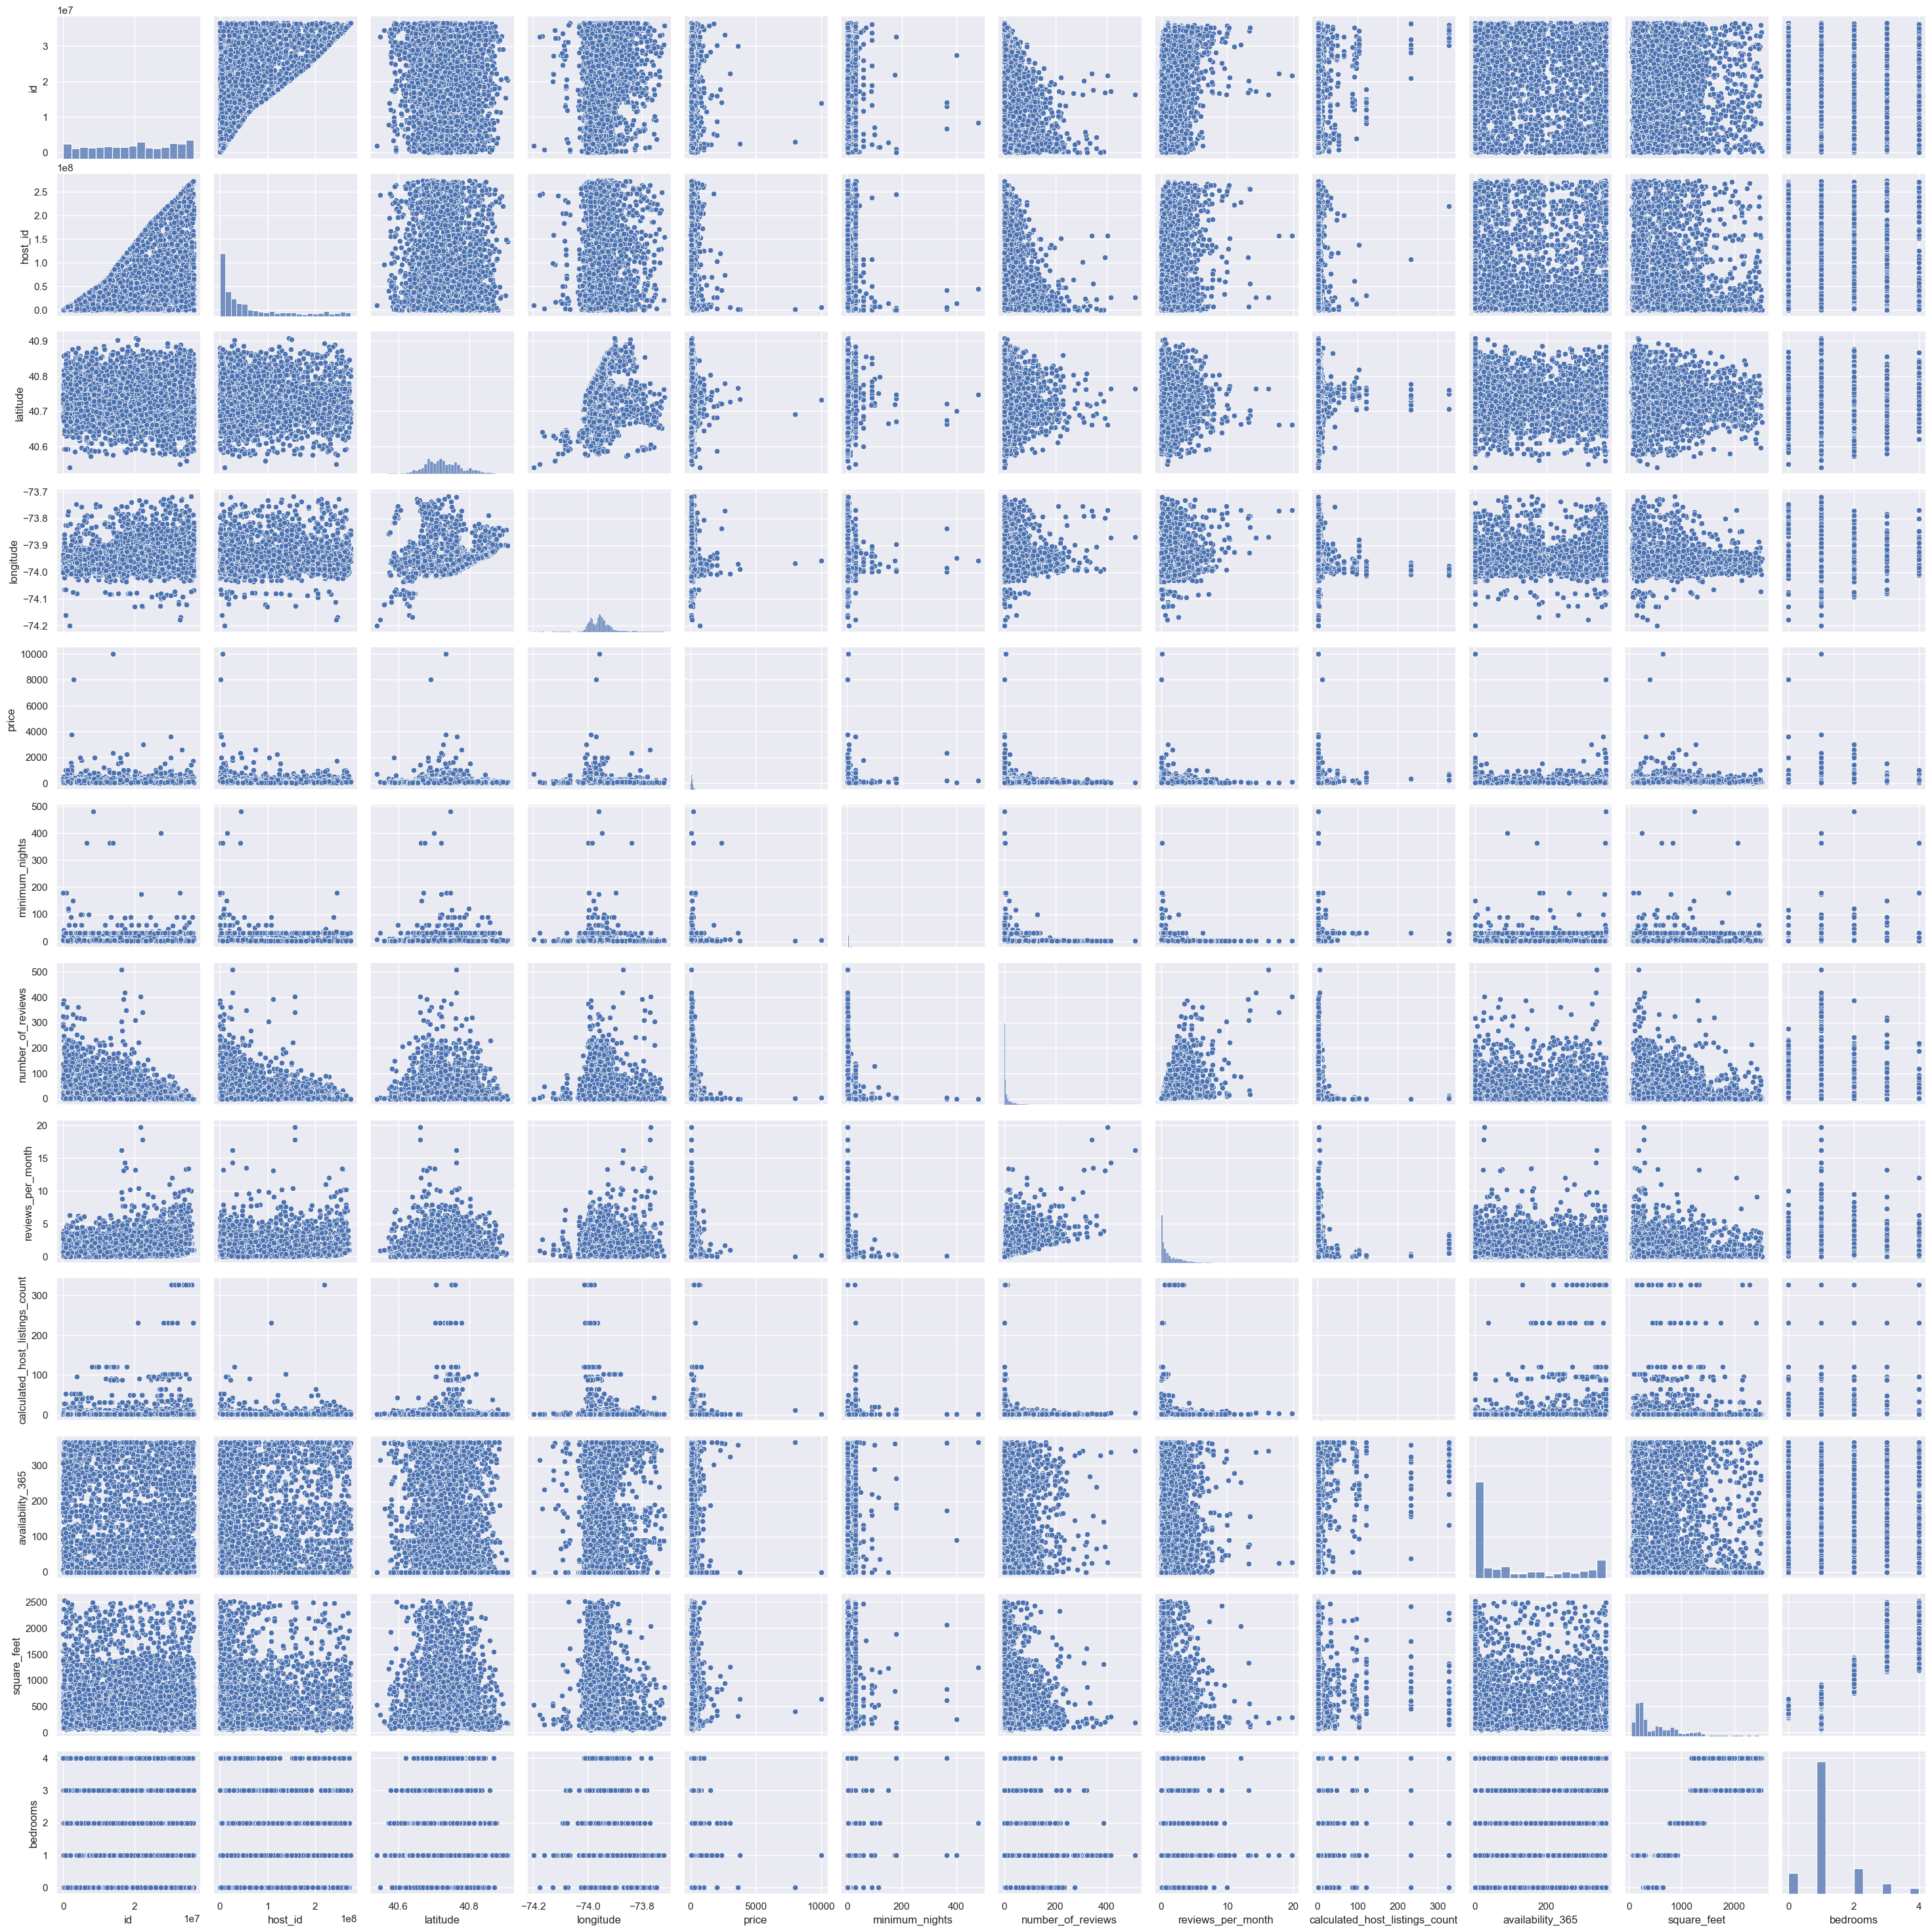

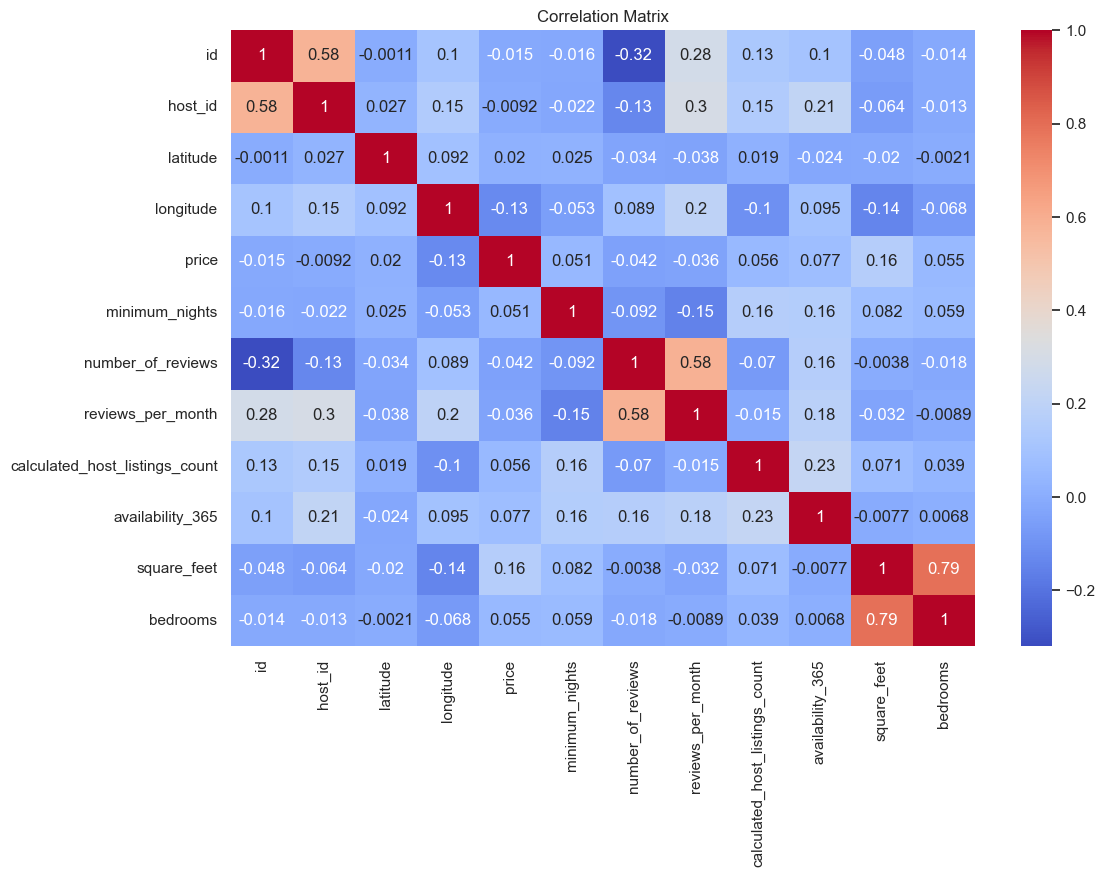

In [249]:
# Pairplot (may take time depending on dataset size)
sbn.pairplot(df[numeric_cols])
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sbn.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

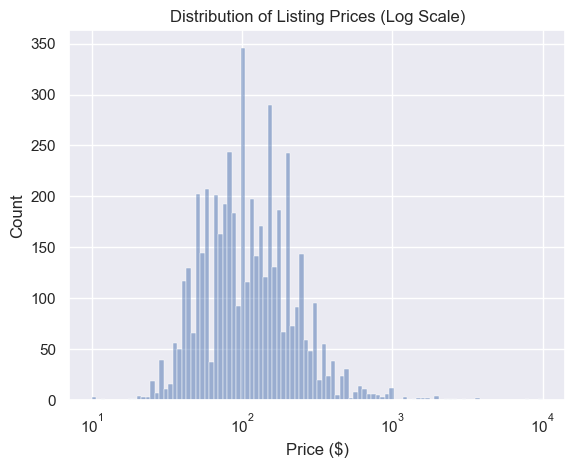

In [250]:
sbn.histplot(df['price'], bins=100, kde=True, log_scale=True)
plt.title('Distribution of Listing Prices (Log Scale)')
plt.xlabel('Price ($)')
plt.show()

neighbourhood_group
Bronx             79.739130
Queens           102.931707
Staten Island    124.615385
Brooklyn         127.020000
Manhattan        187.453778
Name: price, dtype: float64


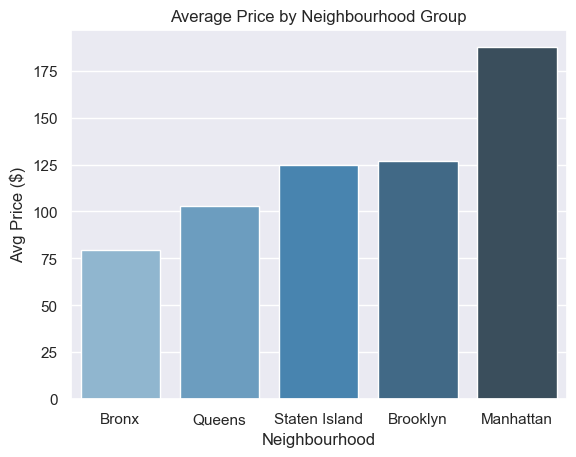

In [251]:
avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values()
print(avg_price)
sbn.barplot(
    x=avg_price.index, 
    y=avg_price.values, 
    hue=avg_price.index,  # Assign x to hue
    palette="Blues_d", 
    legend=False          # Turn off the redundant legend
)
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood')
plt.ylabel('Avg Price ($)')
plt.show()

room_type
Shared room         53.517544
Private room        84.412500
Entire home/apt    211.068200
Name: price, dtype: float64


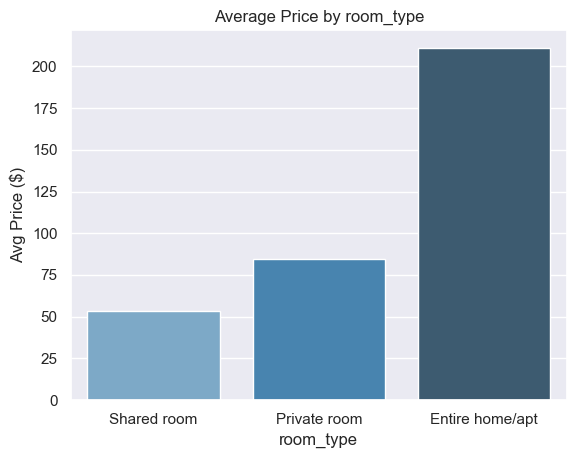

In [252]:
avg_price = df.groupby('room_type')['price'].mean().sort_values()
print(avg_price)
sbn.barplot(
    x=avg_price.index, 
    y=avg_price.values, 
    hue=avg_price.index,  # Assign x to hue
    palette="Blues_d", 
    legend=False          # Turn off the redundant legend
)
plt.title('Average Price by room_type')
plt.xlabel('room_type')
plt.ylabel('Avg Price ($)')
plt.show()

# 4. data cleaning

## 4.1 drop column

In [253]:
col_to_del = ['id', 'name','host_id','host_name', 'last_review']
df_1 = df.drop(columns=col_to_del)

In [254]:
df_1.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,square_feet,bedrooms
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,3962.000000,5000.00000,5000.000000,4729.000000,4746.000000
mean,40.728155,-73.951201,148.707800,6.667800,22.725600,1.355704,6.56100,107.869200,573.133432,1.218921
std,0.054884,0.046119,246.528892,16.827135,44.407611,1.719139,29.84254,130.035729,512.675865,0.820643
min,40.538840,-74.198260,0.000000,1.000000,0.000000,0.010000,1.00000,0.000000,53.000000,0.000000
25%,40.689575,-73.982647,65.000000,1.000000,1.000000,0.180000,1.00000,0.000000,201.000000,1.000000
50%,40.722520,-73.955075,100.000000,2.000000,5.000000,0.680000,1.00000,37.500000,333.000000,1.000000
75%,40.762637,-73.934487,174.000000,5.000000,23.000000,2.000000,2.00000,216.250000,817.000000,1.000000
max,40.907340,-73.716900,10000.000000,480.000000,510.000000,19.750000,327.00000,365.000000,2532.000000,4.000000


## 4.2 Missing Values

In [255]:
total_null = df_1['reviews_per_month'].isnull().sum()
print(total_null, len(df_1)-total_null)

1038 3962


In [256]:
#too many null --> cannot drop rows
df_1['reviews_per_month'].fillna(0, inplace=True)

C:\Users\sh_m_\AppData\Local\Temp\ipykernel_2024\657434591.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1['reviews_per_month'].fillna(0, inplace=True)


In [257]:
total_null = df_1['reviews_per_month'].isnull().sum()
print(total_null, len(df_1)-total_null)

0 5000


In [258]:
print('before:', df_1['bedrooms'].isnull().sum())
df_1['bedrooms'] = df_1['bedrooms'].fillna(df_1['bedrooms'].median())
print('after :', df_1['bedrooms'].isnull().sum())

before: 254
after : 0


In [259]:
df_1['bedrooms'] = df_1['bedrooms'].astype(int)

In [260]:
print('before:', df_1['square_feet'].isnull().sum())
df_1['square_feet'] = df_1['square_feet'].fillna(df_1['square_feet'].median())
print('after :', df_1['square_feet'].isnull().sum())

before: 271
after : 0


In [261]:
print((df_1.isnull().sum() / len(df_1)) * 100)

neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
amenities                         0.0
square_feet                       0.0
bedrooms                          0.0
dtype: float64


## 4.3 remove [prices <= 0]

In [265]:
df_2 = df_1[df_1['price'] < df_1['price'].quantile(0.99)]

In [266]:
print("before :",df_1.shape,"\nafter  :",df_2.shape)

before : (5000, 14) 
after  : (4950, 14)


## 4.4 

In [268]:
col_to_rv = ['price', 'number_of_reviews', 'minimum_nights']
df_3 = df_2.drop(columns=col_to_rv)
df_3['price_log'] = np.log1p(df_2['price'])
df_3['reviews_log'] = np.log1p(df_2['number_of_reviews'])
df_3['nights_log'] = np.log1p(df_2['minimum_nights'])

## 4.5

In [270]:
df_cleaned = df_3
df_cleaned.describe(include = 'all')

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,reviews_per_month,calculated_host_listings_count,availability_365,amenities,square_feet,bedrooms,price_log,reviews_log,nights_log
count,4950,4950,4950.000000,4950.000000,4950,4950.000000,4950.000000,4950.000000,4950,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000
unique,5,182,NaN,NaN,3,NaN,NaN,NaN,1521,NaN,NaN,NaN,NaN,NaN
top,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,"{""Kitchen""}",NaN,NaN,NaN,NaN,NaN
freq,2095,397,NaN,NaN,2522,NaN,NaN,NaN,291,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,40.728115,-73.951029,NaN,1.078337,6.562626,107.112727,NaN,558.151313,1.206869,4.687838,1.968242,1.482388
std,NaN,NaN,0.055017,0.046085,NaN,1.627603,29.936661,129.525505,NaN,501.987530,0.800859,0.643588,1.559429,0.857799
min,NaN,NaN,40.538840,-74.198260,NaN,0.000000,1.000000,0.000000,NaN,53.000000,0.000000,0.000000,0.000000,0.693147
25%,NaN,NaN,40.689355,-73.982435,NaN,0.040000,1.000000,0.000000,NaN,206.000000,1.000000,4.189655,0.693147,0.693147
50%,NaN,NaN,40.722240,-73.954890,NaN,0.370000,1.000000,37.000000,NaN,333.000000,1.000000,4.615121,1.791759,1.098612
75%,NaN,NaN,40.762703,-73.934265,NaN,1.520000,2.000000,213.750000,NaN,785.750000,1.000000,5.141664,3.178054,1.791759


## 4.4 text parsing

In [271]:
'''def clean_amenities(text):
    if pd.isna(text):
        return ""
    clean_text = text.replace('{', '').replace('}', '').replace('"', '')
    return clean_text

df['amenities'] = df_cleaned['amenities'].apply(clean_amenities)
print(df_cleaned['amenities'].head())
'''

'def clean_amenities(text):\n    if pd.isna(text):\n        return ""\n    clean_text = text.replace(\'{\', \'\').replace(\'}\', \'\').replace(\'"\', \'\')\n    return clean_text\n\ndf[\'amenities\'] = df_cleaned[\'amenities\'].apply(clean_amenities)\nprint(df_cleaned[\'amenities\'].head())\n'

In [272]:
import ast

def count_amenities(x):
    try:
        return len(ast.literal_eval(x))
    except:
        return 0

df_cleaned['amenities_count'] = df_cleaned['amenities'].apply(count_amenities)
df_cleaned.drop(columns=['amenities'], inplace=True)

# 5. 

In [273]:
results_path = 'New_York_Airbnb_Enhanced_clean.csv'
df_cleaned.to_csv(results_path, index=False)

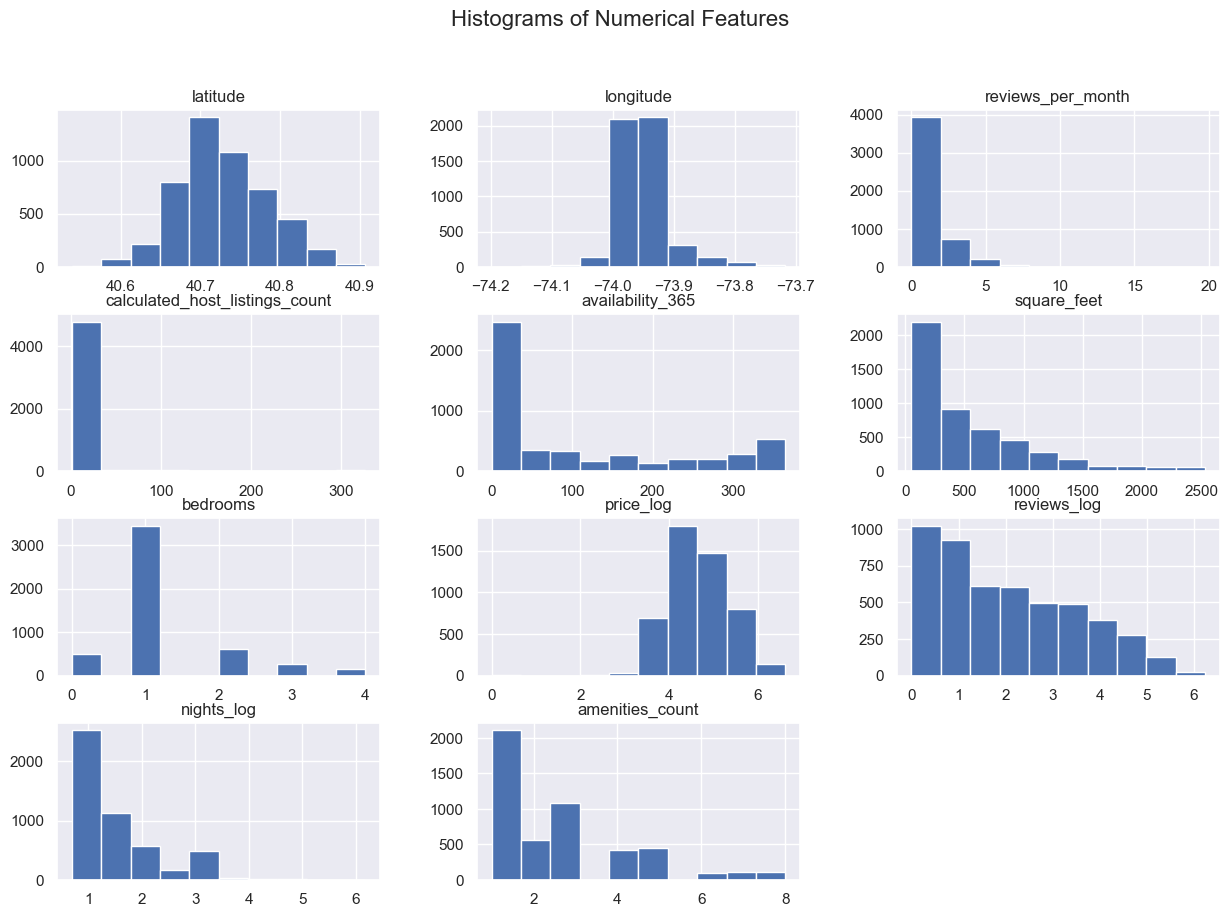

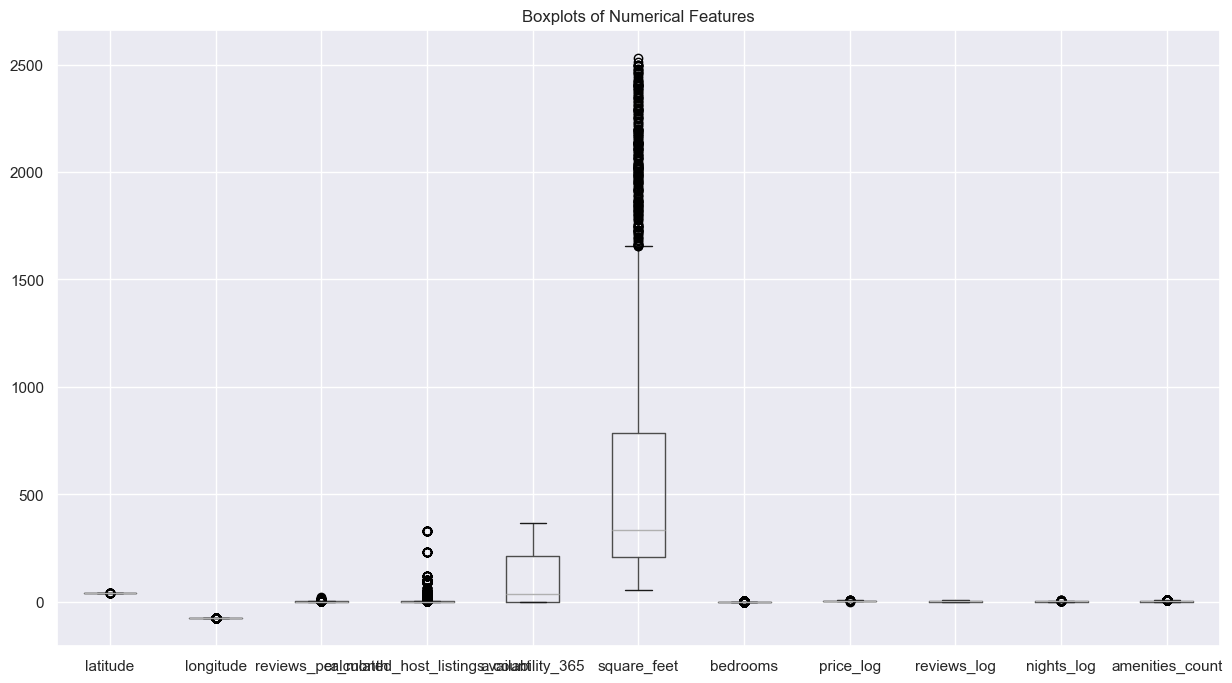

In [277]:
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Histograms
df_cleaned[numeric_cols].hist(figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

# Boxplots
plt.figure(figsize=(15, 8))
df_cleaned[numeric_cols].boxplot()
plt.title("Boxplots of Numerical Features")
plt.show()